<a href="https://colab.research.google.com/github/rohit9650/ML/blob/master/AML/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io

In [2]:
"""
uploading file in "Google Colaboratory"
"""
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [5]:
df = pd.read_csv(io.StringIO(uploaded['SMSSpamCollection'].decode('utf-8')), delimiter='\t')
df.drop_duplicates(subset='sms', inplace=True)
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
from sklearn.model_selection import train_test_split
x = df['sms']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

models = defaultdict()

"""

"""
logistic_regression = LogisticRegression()
models['logistic_regression'] = logistic_regression

"""

"""
decision_tree = DecisionTreeClassifier()
models['decision_tree'] = decision_tree

"""

"""
random_forest = RandomForestClassifier()
models['random_forest'] = random_forest

"""

"""
svm = svm.LinearSVC()
models['svm'] = svm


for key, model in models.items():
    pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', model)])
    cv_score = cross_val_score(pipeline, x_train, y_train, cv=5).mean()
    print("The cross validation score for {} is {}".format(key, cv_score))


The cross validation score for logistic_regression is 0.9618164025542468
The cross validation score for decision_tree is 0.957945097099017
The cross validation score for random_forest is 0.9659411107072302
The cross validation score for svm is 0.9842590484390857





Report for logistic_regression
---------------------------

Accuracy score is : 0.9675174013921114

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1124
        spam       0.98      0.77      0.86       169

   micro avg       0.97      0.97      0.97      1293
   macro avg       0.97      0.88      0.92      1293
weighted avg       0.97      0.97      0.97      1293

           pred ham  pred spam
true ham       1121          3
true spam        39        130




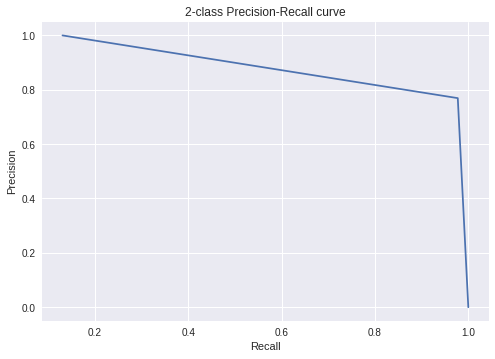




Report for decision_tree
---------------------------

Accuracy score is : 0.951276102088167

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97      1124
        spam       0.83      0.79      0.81       169

   micro avg       0.95      0.95      0.95      1293
   macro avg       0.90      0.88      0.89      1293
weighted avg       0.95      0.95      0.95      1293

           pred ham  pred spam
true ham       1096         28
true spam        35        134




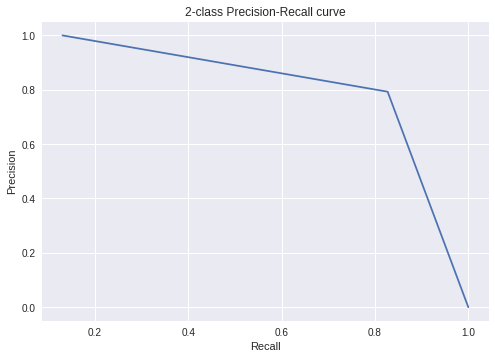




Report for random_forest
---------------------------

Accuracy score is : 0.9621036349574633

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1124
        spam       1.00      0.71      0.83       169

   micro avg       0.96      0.96      0.96      1293
   macro avg       0.98      0.86      0.90      1293
weighted avg       0.96      0.96      0.96      1293

           pred ham  pred spam
true ham       1124          0
true spam        49        120




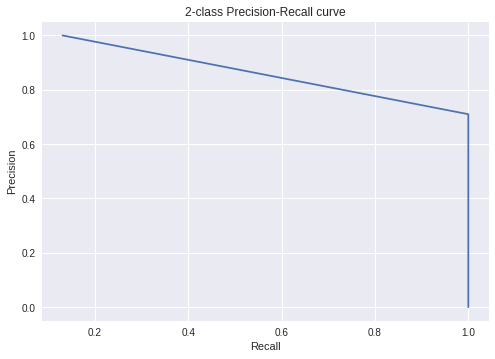




Report for svm
---------------------------

Accuracy score is : 0.982985305491106

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1124
        spam       0.96      0.91      0.93       169

   micro avg       0.98      0.98      0.98      1293
   macro avg       0.97      0.95      0.96      1293
weighted avg       0.98      0.98      0.98      1293

           pred ham  pred spam
true ham       1118          6
true spam        16        153




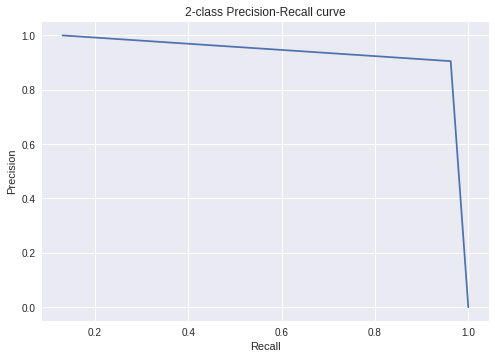

In [48]:
"""
Precision is defined as the number of true positives over the number of 
true positives plus the number of false positives.

Recall is defined as the number of true positives over the number of 
true positives plus the number of false negatives.
"""
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def get_binary_label(label):
    if label == 'spam':
        return 1
    else:
        return 0

for key, model in models.items():
  
    print('\n\n\nReport for {}'.format(key))
    print('---------------------------\n')
    
    pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', model)])
    pipeline.fit(x_train, y_train)
    
    y_score = pipeline.predict(x_test)
    
    #for precision and recall
    y_true = [get_binary_label(label) for label in list(y_test)] 
    y_scores = [get_binary_label(label) for label in list(y_score)]

    print('Accuracy score is : {}\n'
          .format(accuracy_score(y_test, y_score)))
    
    target_names = ['ham', 'spam']
    print(classification_report(y_test, y_score, target_names=target_names))
    
    print(pd.DataFrame(confusion_matrix(y_test, y_score),
                 index={'true ham', 'true spam'},
                 columns={'pred ham', 'pred spam'}))
    
    print("\n")
    
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(precision, recall)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('2-class Precision-Recall curve')
    plt.show()
    